In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [69]:
#Cargar dataset
df = pd.read_csv('job_descriptions.csv', encoding="utf-8")

#analisis de datos
df.info()

#numero de filas
numero_filas = len(df)
print(f"\nNúmero de filas: {numero_filas}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [70]:
#Eliminar columnas no necesarias
columns_to_remove = ['Job Id', 'Experience', 'Salary Range', 'location', 'Country', 'latitude', 'longitude',
                     'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 
                     'Job Portal', 'Benefits', 'Company', 'Company Profile']

df = df.drop(columns_to_remove, axis=1)

# Imprimir el número de columnas
print("Número de columnas:", len(df.columns))

valores_a_conservar = ["Web Developer", "Network Engineer", "Software Tester","UX/UI Designer", "QA Analyst", "Network Administrator",
                        "Software Engineer", "Network Security Specialist","UI Developer", "Data Analyst",'IT Support Specialist','Software Developer','Data Engineer',
                        'Systems Engineer','Database Developer','Systems Analyst','Java Developer','Front-End Engineer','Back-End Developer','Network Technician',
                        'Software Architect','IT Manager','Web Designer','SEO Specialist','Data Scientist','SEO Analyst','Network Analyst'
                        ]

# eliminar filas que no contengan los valores a conservar                        
df = df[df["Job Title"].isin(valores_a_conservar)]

Número de columnas: 6


In [73]:
#reducir las etiquetas a 11000
def sample_n(df, n=11000):
    return df.sample(min(len(df), n))

df = df.groupby('Job Title').apply(sample_n).reset_index(drop=True)

C:\Users\pepeh\AppData\Local\Temp\ipykernel_22048\2939694375.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Job Title').apply(sample_n).reset_index(drop=True)


In [75]:
#numero de filas despues de eliminar
numero_filas = len(df)
print(f"Número de filas: {numero_filas}")

#dataset depues de elimnar datos no necesarios
df.info()

#Nombre del nuevo archivo
df.to_csv("archivo_filtrado.csv", index=False)

Número de filas: 237607
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237607 entries, 0 to 237606
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Qualifications    237607 non-null  object
 1   Job Title         237607 non-null  object
 2   Role              237607 non-null  object
 3   Job Description   237607 non-null  object
 4   skills            237607 non-null  object
 5   Responsibilities  237607 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


In [47]:
# Seleccionar la columna
columna = df["Job Title"]

# Seleccionar la columna
columna2 = df["Role"]

# Contar valores únicos de Job title
jobTitle_valores_unicos = columna.unique().shape[0]

# Contar valores únicos de Job title
role_valores_unicos = columna2.unique().shape[0]

# Imprimir el resultado de job title
print(f"Número de valores únicos en la columna 'Job Title': {jobTitle_valores_unicos}")

# Imprimir el resultado role
print(f"Número de valores únicos en la columna 'Role': {role_valores_unicos}")

Número de valores únicos en la columna 'Job Title': 27
Número de valores únicos en la columna 'Job Title': 66


In [5]:
# Se redujo el dataset de  1615940 filas y 23 columnas a 331035 filas y 6 columnas
#Cargar dataset
data = pd.read_csv('archivo_filtrado.csv', encoding="utf-8")

data.describe()
data.nunique()



Qualifications      10
Job Title           27
Role                66
Job Description     66
skills              66
Responsibilities    66
dtype: int64

In [77]:
data['length Job Description'] = data['Job Description'].str.len()
data['length Job Description'].describe()



count    237607.000000
mean        206.112236
std          61.444524
min         106.000000
25%         170.000000
50%         185.000000
75%         235.000000
max         430.000000
Name: length Job Description, dtype: float64

In [78]:
data['length Responsabilities'] = data['Responsibilities'].str.len()
data['length Responsabilities'].describe()

count    237607.000000
mean        188.678288
std          21.239601
min         139.000000
25%         174.000000
50%         184.000000
75%         199.000000
max         249.000000
Name: length Responsabilities, dtype: float64

In [79]:
data['length skills'] = data['skills'].str.len()
data['length skills'].describe()

count    237607.000000
mean        141.345158
std          55.746567
min          64.000000
25%          92.000000
50%         128.000000
75%         164.000000
max         270.000000
Name: length skills, dtype: float64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_22048\440068118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length Job Description']).set_title('Job Description length distribution')


Text(0.5, 1.0, 'Job Description length distribution')

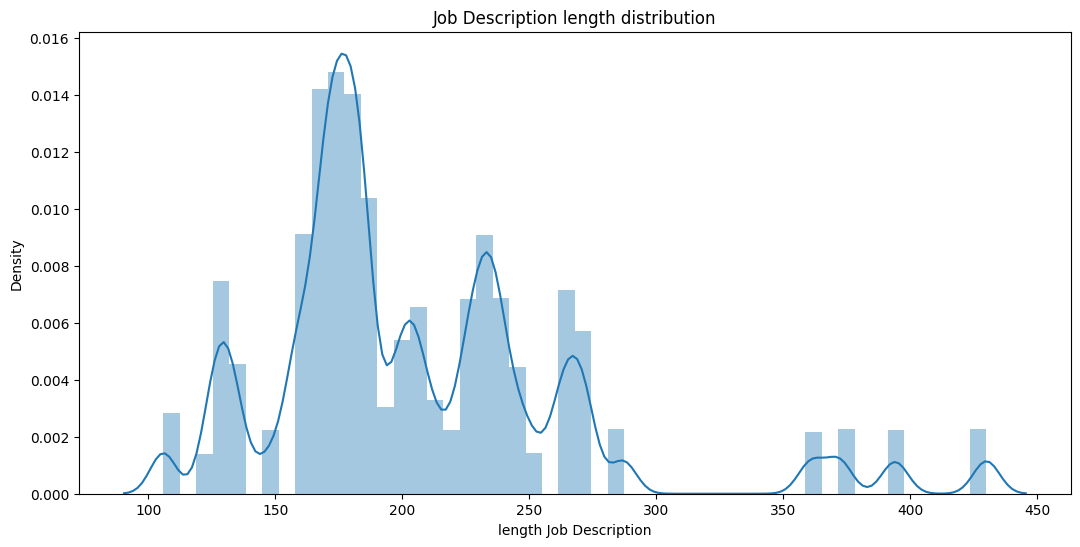

In [80]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length Job Description']).set_title('Job Description length distribution')

C:\Users\pepeh\AppData\Local\Temp\ipykernel_22048\3550602166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length Responsabilities']).set_title('Responsabilities length distribution')


Text(0.5, 1.0, 'Responsabilities length distribution')

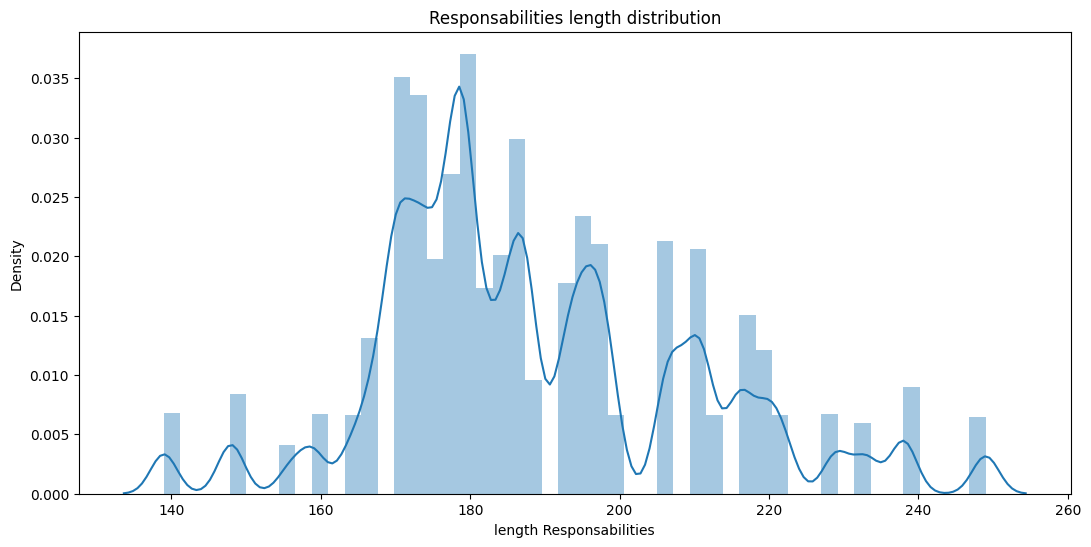

In [81]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length Responsabilities']).set_title('Responsabilities length distribution')

C:\Users\pepeh\AppData\Local\Temp\ipykernel_22048\3200318755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length skills']).set_title('skills length distribution')


Text(0.5, 1.0, 'skills length distribution')

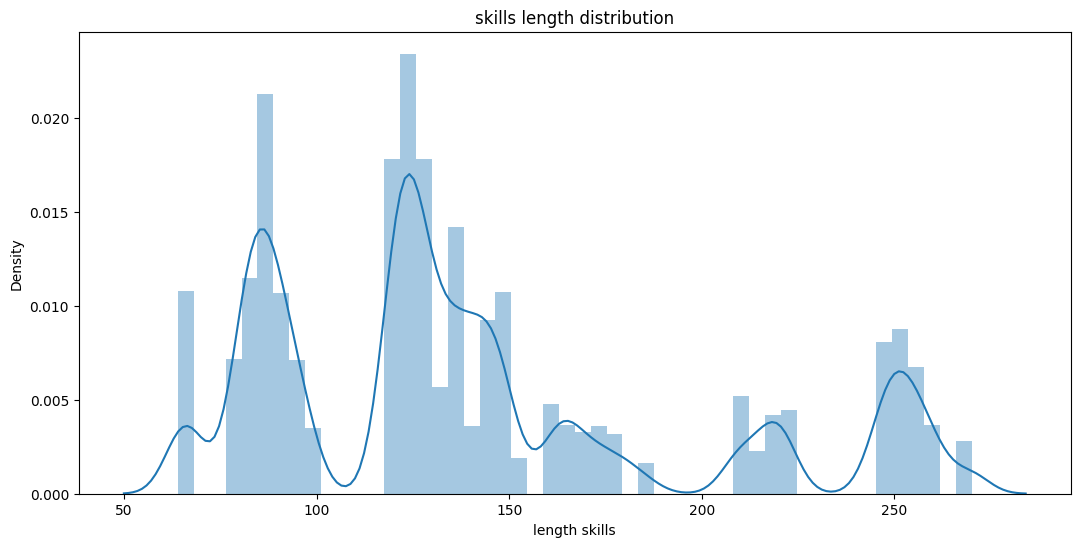

In [82]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length skills']).set_title('skills length distribution')

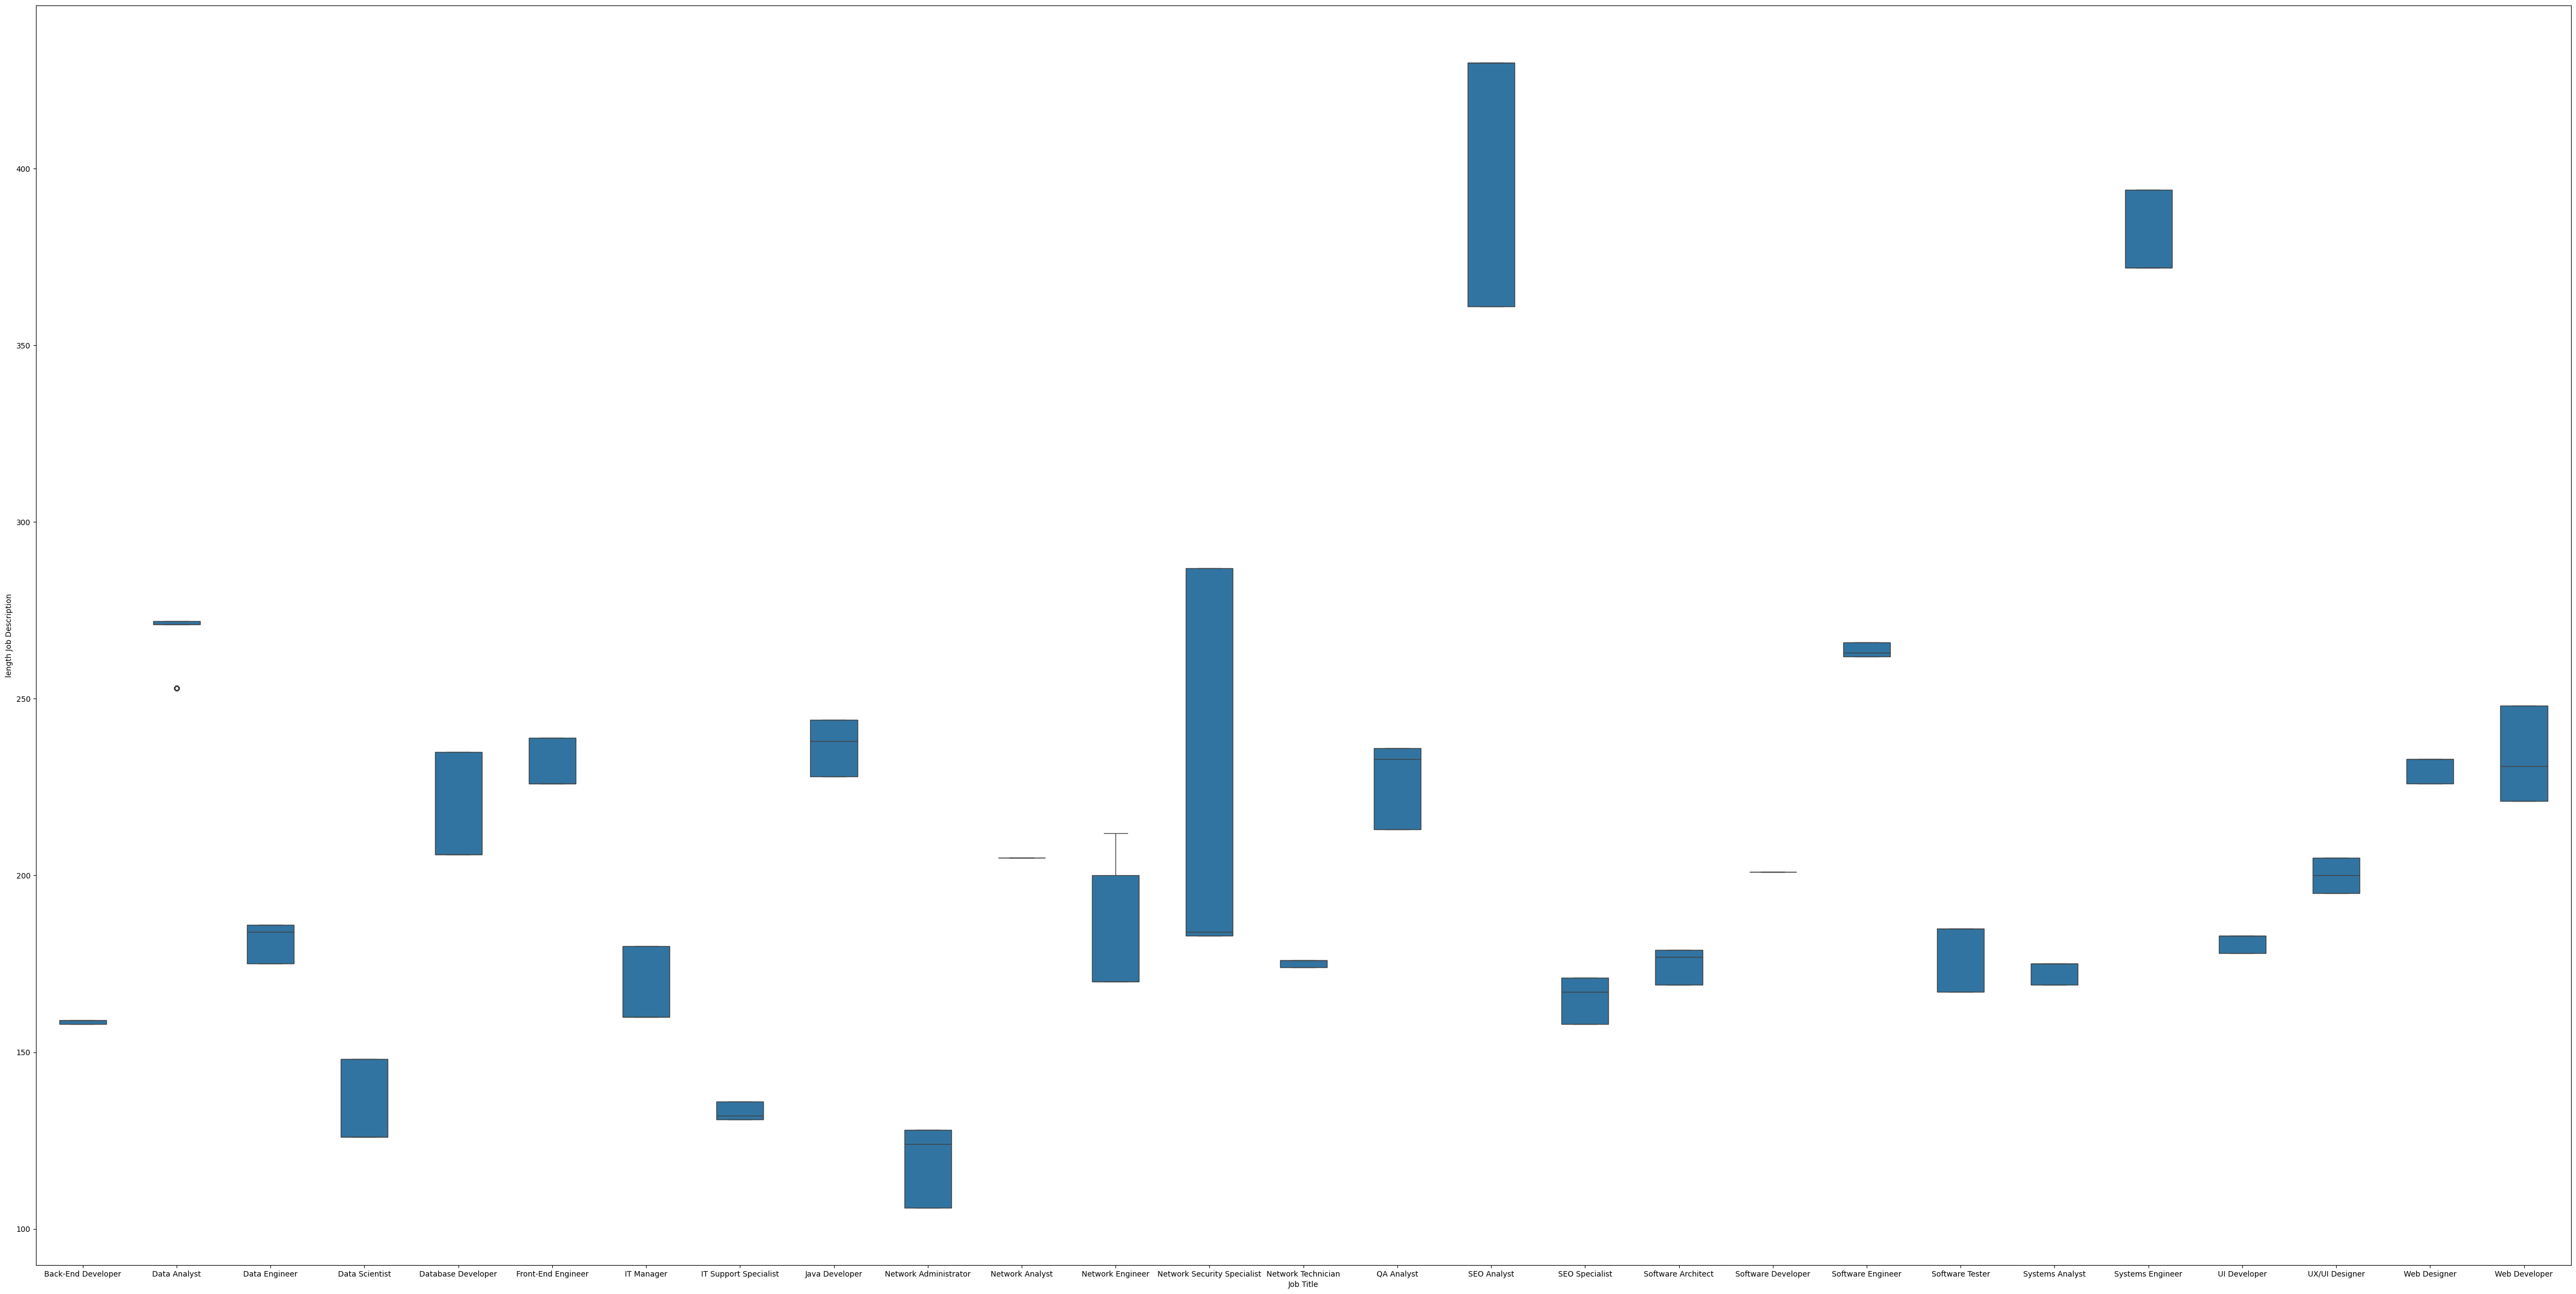

In [83]:
plt.figure(figsize=(60,30))
sns.boxplot(data=data, x='Job Title', y='length Job Description', width=.5);

In [85]:
data['Job Title'].value_counts()

Job Title
Network Administrator          11000
Network Engineer               11000
Software Tester                11000
UX/UI Designer                 11000
UI Developer                   11000
Data Analyst                   11000
Software Engineer              11000
Java Developer                 10589
IT Support Specialist          10525
Network Security Specialist    10520
QA Analyst                     10516
Software Architect             10464
Data Engineer                  10462
SEO Specialist                 10401
Web Developer                  10361
IT Manager                      7092
Front-End Engineer              7086
Systems Analyst                 7037
Back-End Developer              6982
Network Technician              6977
Systems Engineer                6952
Data Scientist                  6940
Web Designer                    6921
Database Developer              6908
SEO Analyst                     6875
Software Developer              3517
Network Analyst             

C:\Users\pepeh\AppData\Local\Temp\ipykernel_22048\1002433566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Job Title", data=data, palette='Reds')


<Axes: xlabel='count', ylabel='Job Title'>

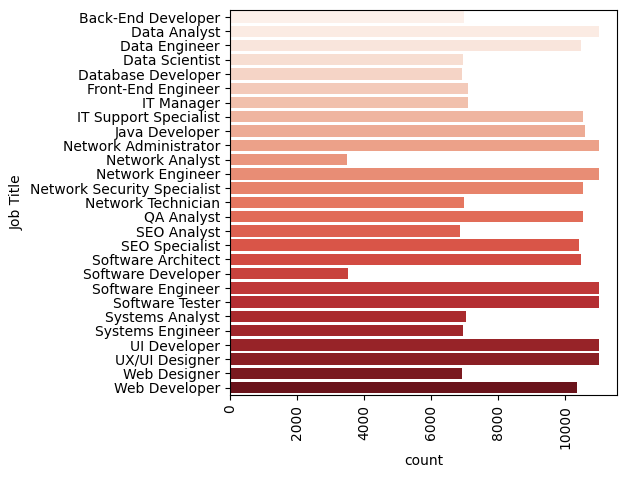

In [86]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Job Title", data=data, palette='Reds')

In [87]:

data['Job Title'].value_counts()[:3].index

Index(['Network Administrator', 'Network Engineer', 'Software Tester'], dtype='object', name='Job Title')

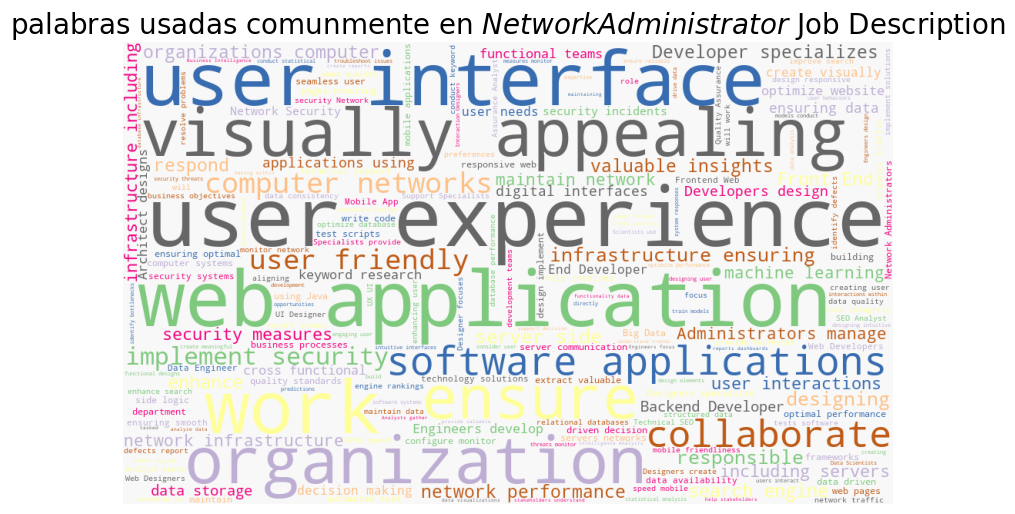

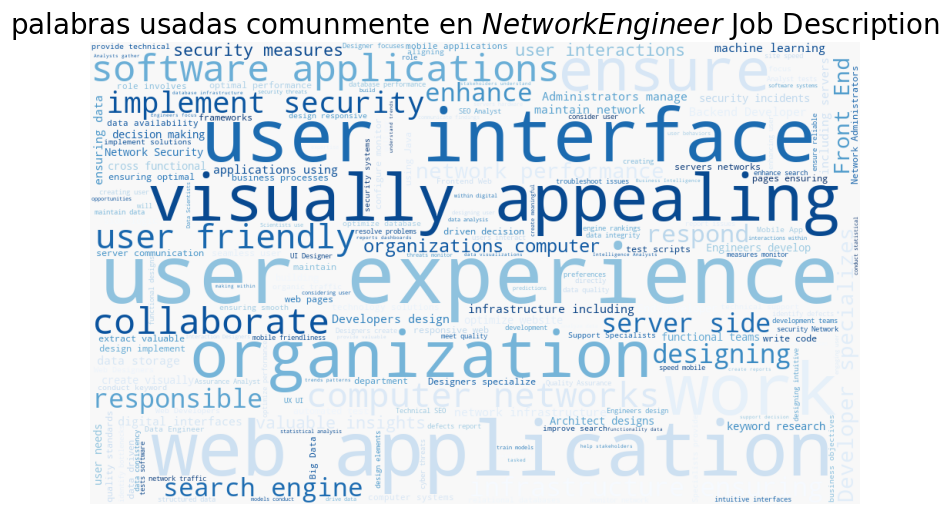

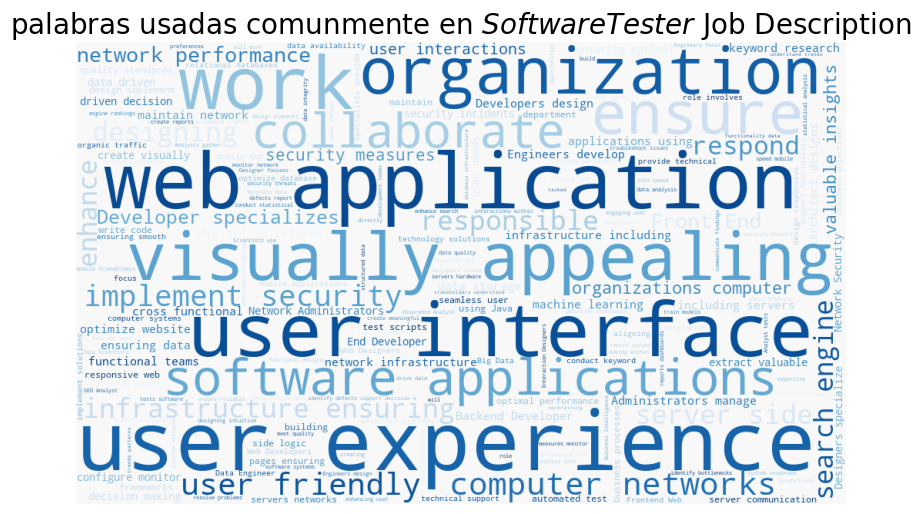

In [34]:
labels = ["Web Developer", "Network Engineer", "Software Tester","UX/UI Designer", "QA Analyst", "Network Administrator",
            "Software Engineer", "Network Security Specialist","UI Developer", "Data Analyst",'IT Support Specialist','Software Developer','Data Engineer',
            'Systems Engineer','Database Developer','Systems Analyst','Java Developer','Front-End Engineer','Back-End Developer','Network Technician',
            'Software Architect','IT Manager','Web Designer','SEO Specialist','Data Scientist','SEO Analyst','Network Analyst']

a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = data['Job Title'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = data[data["Job Title"].isin(labels)]["Job Description"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Job Description", size=20)
    plt.show()

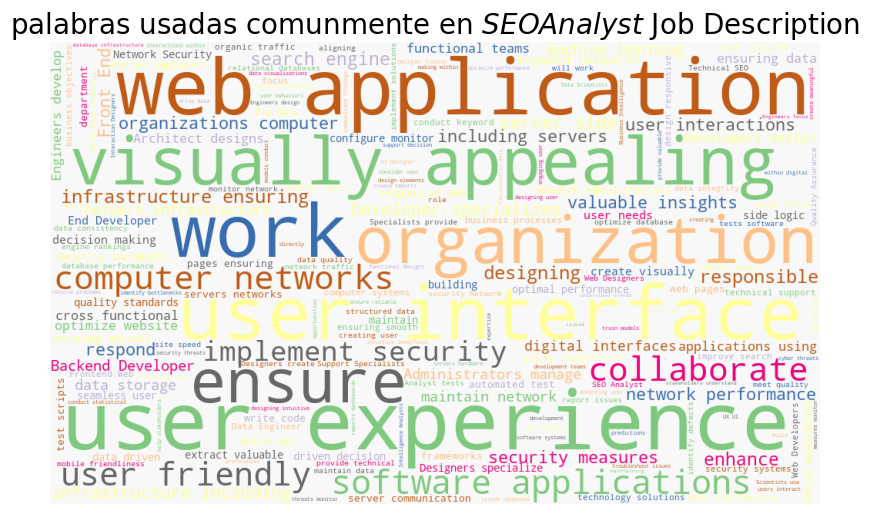

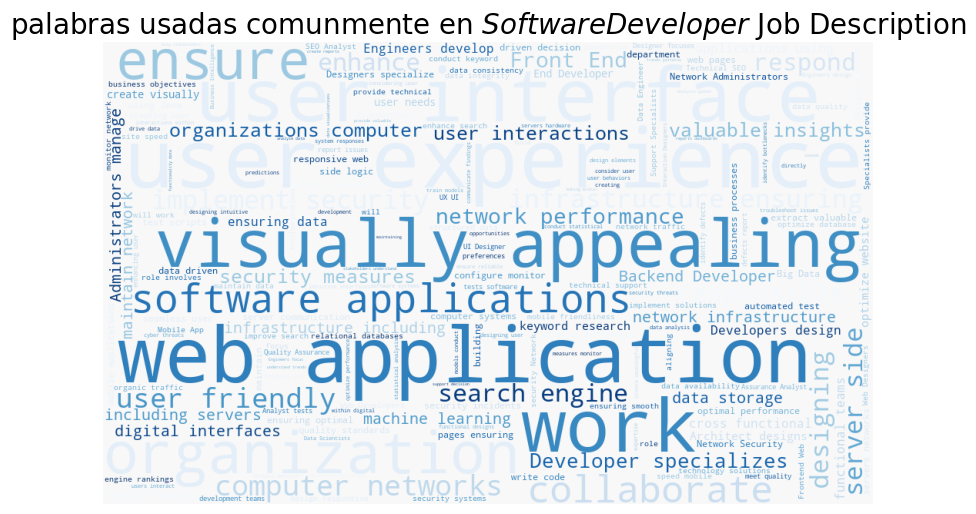

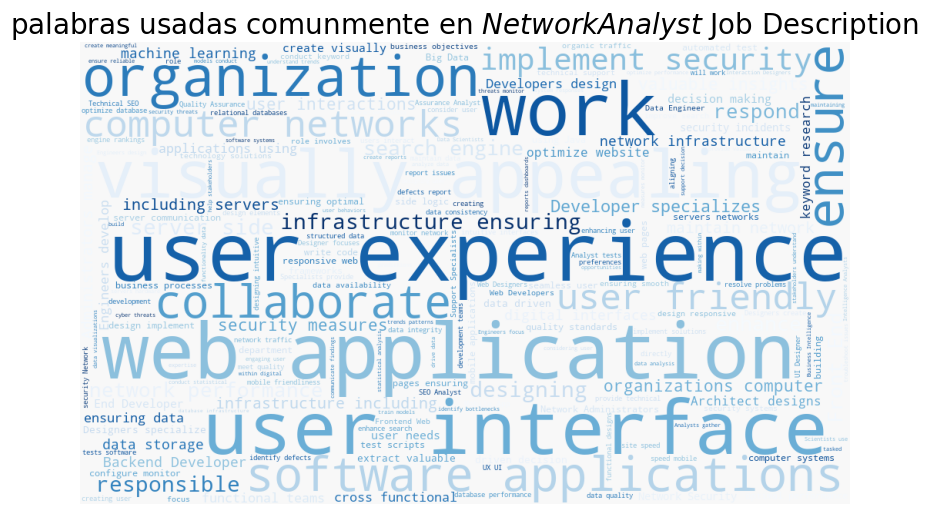

In [36]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = data['Job Title'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = data[data["Job Title"].isin(labels)]["Job Description"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Job Description", size=20)
    plt.show()

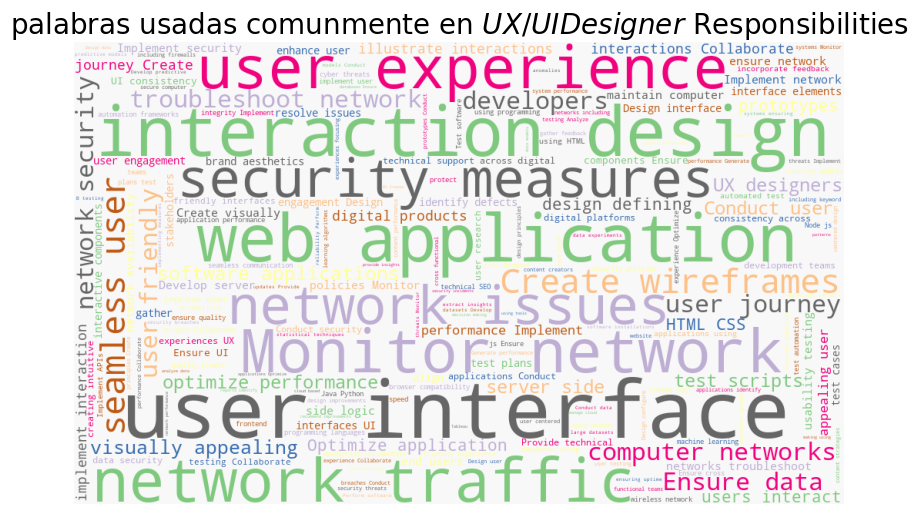

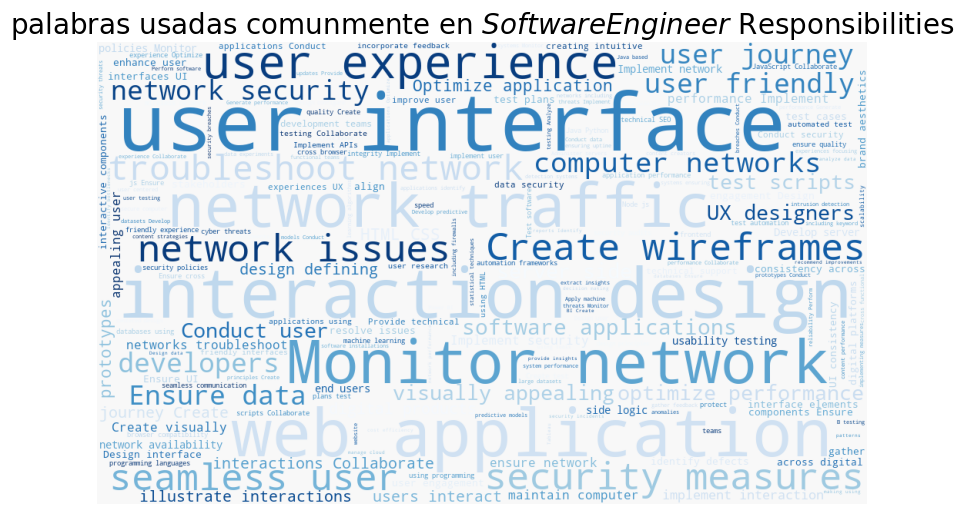

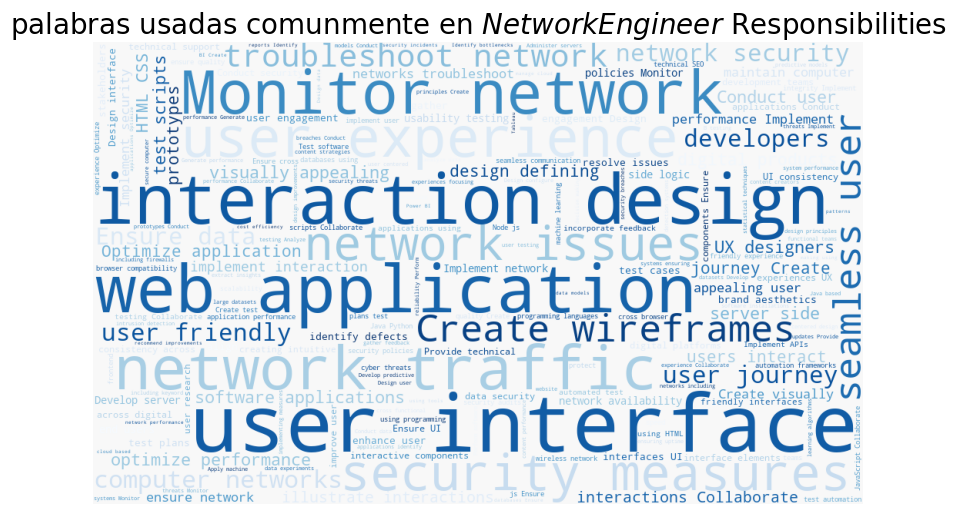

In [20]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = data['Job Title'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = data[data["Job Title"].isin(labels)]["Responsibilities"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()

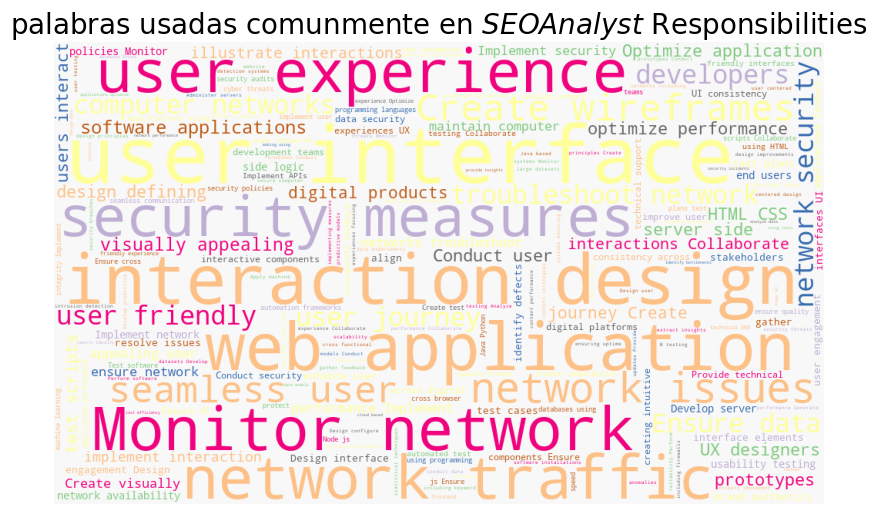

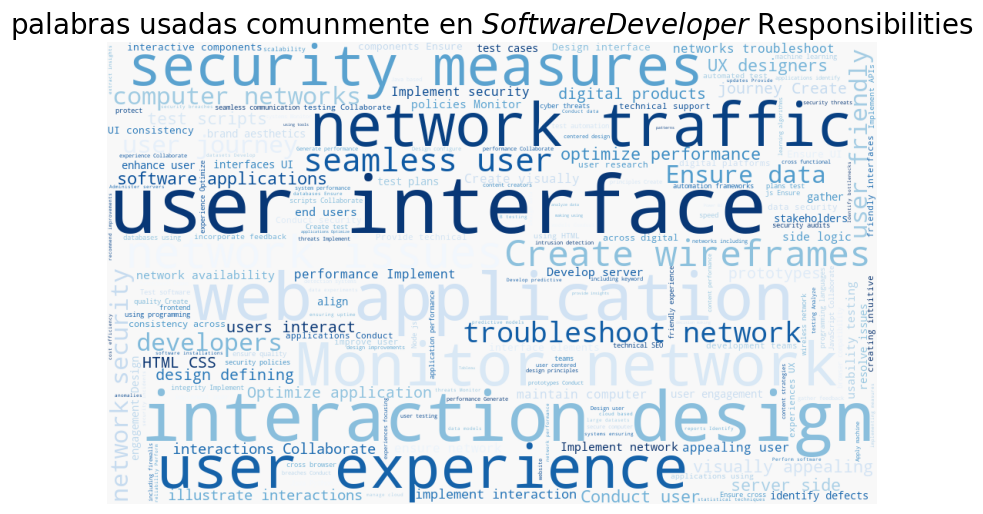

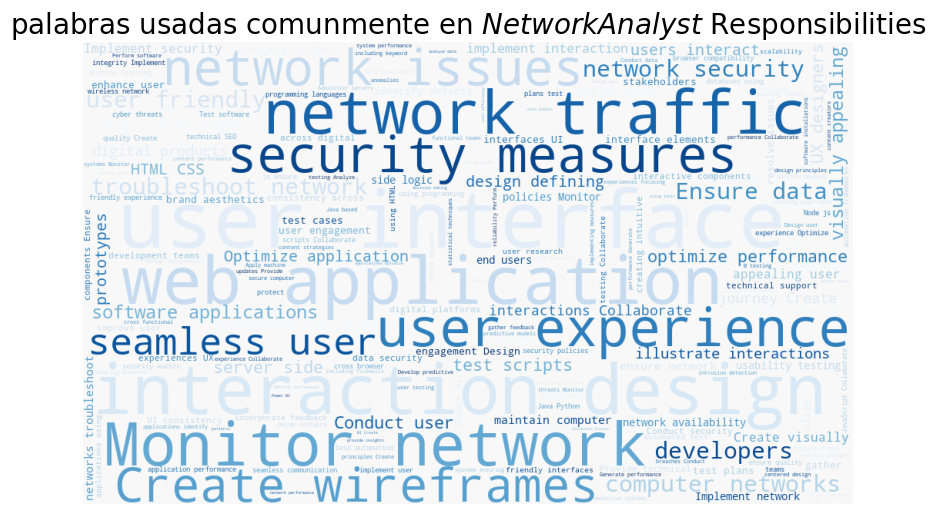

In [21]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = data['Job Title'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = data[data["Job Title"].isin(labels)]["Responsibilities"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()